<a href="https://colab.research.google.com/github/Gladn/Colaboratory_new/blob/main/mediapipeROCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.4 MB 18 kB/s 
     |████████████████████████████████| 394.4 MB 22 kB/s 
     |████████████████████████████████| 33.0 MB 1.5 MB/s 
     |████████████████████████████████| 3.8 MB 50.4 MB/s 
     |████████████████████████████████| 2.9 MB 60.3 MB/s 
     |████████████████████████████████| 132 kB 61.2 MB/s 
     |████████████████████████████████| 14.9 MB 55.4 MB/s 
     |████████████████████████████████| 462 kB 54.8 MB/s 
     |████████████████████████████████| 33.0 MB 321 kB/s 
     |████████████████████████████████| 31.5 MB 1.3 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=9dfdd74bdbca79c1560d2ce5efa4673bdc94d88ce020f2d48b6dc76cfcf20950
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [ ]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(False)
npDraw = mp.solutions.drawing_utils
pTime = 0
cTime = 0

In [ ]:
# инициализировать класс Hands и сохранить его в переменной.
mp_hands = mp.solutions.hands
# установить функцию рук, которая будет удерживать точки ориентиров.
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
# настроить функцию рисования ориентиров рук на изображении
mp_drawing = mp.solutions.drawing_utils

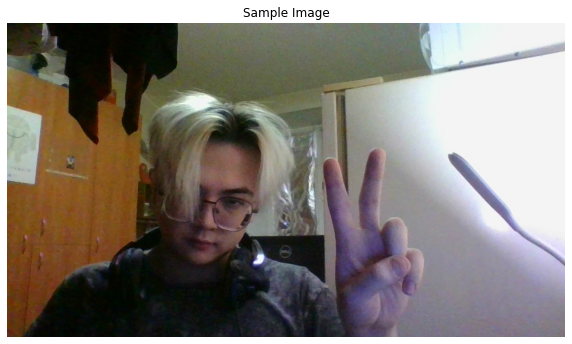

In [ ]:
# чтение изображения
sample_img = cv2.imread('/content/C1.jpg')
# размер  и отображение плота
plt.figure(figsize = [10, 10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [ ]:
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.multi_hand_landmarks:
   for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

HAND NUMBER: 1
-----------------------
WRIST:
x: 0.6606552600860596
y: 0.9518865346908569
z: 5.348014724404493e-07

THUMB_CMC:
x: 0.6286455392837524
y: 0.9269967079162598
z: -0.05605410039424896



In [ ]:
image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):    
            print(f'{mp_hands.HandLandmark(i).name}:') 
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}n')

HAND NUMBER: 1
-----------------------
WRIST:
x: 839.2410278320312
y: 696.5634155273438
z: 0.0007098430796759203n
THUMB_CMC:
x: 799.7011566162109
y: 669.8799848556519
z: -56.19870662689209n


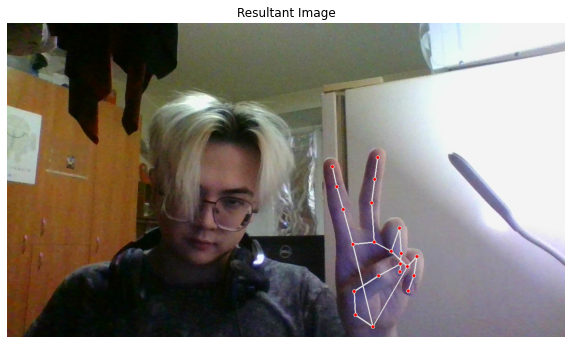

In [ ]:
img_copy = sample_img.copy()
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])
    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

In [ ]:
for landmarks in hand_landmarks.landmark:
        print(landmarks)

x: 0.6792420744895935
y: 0.9092046022415161
z: 2.4244235063974884e-08

x: 0.6388159990310669
y: 0.8781884908676147
z: -0.039695002138614655

x: 0.6201449036598206
y: 0.8148775696754456
z: -0.06561261415481567

x: 0.6404126882553101
y: 0.7553290724754333
z: -0.0892789289355278

x: 0.6720566153526306
y: 0.7160915732383728
z: -0.11061052232980728

x: 0.6035800576210022
y: 0.6617041230201721
z: -0.04029032960534096

x: 0.5845441818237305
y: 0.5508790016174316
z: -0.06518945097923279

x: 0.5723448395729065
y: 0.4825223982334137
z: -0.07749669998884201

x: 0.5633099675178528
y: 0.4209783673286438
z: -0.08455969393253326

x: 0.6424232125282288
y: 0.6550348401069641
z: -0.0354173481464386

x: 0.6547410488128662
y: 0.6094628572463989
z: -0.08158688992261887

x: 0.661724328994751
y: 0.6964063048362732
z: -0.09427867084741592

x: 0.6612722277641296
y: 0.7525737285614014
z: -0.09021997451782227

x: 0.6785867810249329
y: 0.6588487029075623
z: -0.03405000641942024

x: 0.6917635202407837
y: 0.6168846

In [ ]:
fingerCount = 0
if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        # Получить указатель руки для проверки метки (левый или правый)
        handIndex = results.multi_hand_landmarks.index(hand_landmarks)
        handLabel = results.multi_handedness[handIndex].classification[0].label
        # Установите переменную, чтобы сохранить положение ориентиров (x и y)
        handLandmarks = []

        # Заполните список позициями x и y 
        for landmarks in hand_landmarks.landmark:
          handLandmarks.append([landmarks.x, landmarks.y])

        # Большие пальцы
        if handLabel == "Left" and handLandmarks[4][0] > handLandmarks[3][0]:
          fingerCount = fingerCount+1
        elif handLabel == "Right" and handLandmarks[4][0] < handLandmarks[3][0]:
          fingerCount = fingerCount+1

        # положение пальцев
        #Указательный
        if handLandmarks[8][1] < handLandmarks[6][1]:      
          fingerCount = fingerCount+1
        #Средний
        if handLandmarks[12][1] < handLandmarks[10][1]:     
          fingerCount = fingerCount+1
        #
        if handLandmarks[16][1] < handLandmarks[14][1]:     
          fingerCount = fingerCount+1
        if handLandmarks[20][1] < handLandmarks[18][1]:     
          fingerCount = fingerCount+1

print(fingerCount)

2


In [ ]:
rbool = 0
lbool = 0
if handLabel == "Right" and handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > handLandmarks[10][1] and handLandmarks[16][1] > handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: rbool = 1
print("Рука справа: ", rbool)
if handLabel == "Left" and handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > handLandmarks[10][1] and handLandmarks[16][1] > handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: lbool = 1
print("Рука слева: ", lbool)


Рука справа:  1
Рука слева:  0


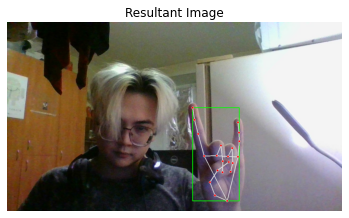

In [ ]:
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils


frame = img_copy

h, w, c = frame.shape

hand_landmarks = results.multi_hand_landmarks
if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)

plt.title("Resultant Image");plt.axis('off');plt.imshow(frame[:,:,::-1]);plt.show()



In [ ]:
sample_img = cv2.imread('/content/C6.jpg')
plt.figure(figsize = [10, 10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.multi_hand_landmarks:
    
   for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):    
            print(f'{mp_hands.HandLandmark(i).name}:') 
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}n')
img_copy = sample_img.copy()

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])

    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()
fingerCount = 0
rbool = 0
lbool = 0
if results.multi_hand_landmarks:

      for hand_landmarks in results.multi_hand_landmarks:
        # Get hand index to check label (left or right)
        handIndex = results.multi_hand_landmarks.index(hand_landmarks)
        handLabel = results.multi_handedness[handIndex].classification[0].label

        # Set variable to keep landmarks positions (x and y)
        handLandmarks = []

        # Fill list with x and y positions of each landmark
        for landmarks in hand_landmarks.landmark:
          handLandmarks.append([landmarks.x, landmarks.y])

        # Test conditions for each finger: Count is increased if finger is 
        #   considered raised.
        # Thumb: TIP x position must be greater or lower than IP x position, 
        #   deppeding on hand label.
        if handLabel == "Left" and handLandmarks[4][0] > handLandmarks[3][0]:
          fingerCount = fingerCount+1
        elif handLabel == "Right" and handLandmarks[4][0] < handLandmarks[3][0]:
          fingerCount = fingerCount+1

        # Other fingers: TIP y position must be lower than PIP y position, 
        #   as image origin is in the upper left corner.
        if handLandmarks[8][1] < handLandmarks[6][1]:       #Index finger
          fingerCount = fingerCount+1
        if handLandmarks[12][1] < handLandmarks[10][1]:     #Middle finger
          fingerCount = fingerCount+1
        if handLandmarks[16][1] < handLandmarks[14][1]:     #Ring finger
          fingerCount = fingerCount+1
        if handLandmarks[20][1] < handLandmarks[18][1]:     #Pinky
          fingerCount = fingerCount+1

        if handLabel == "Right" and handLandmarks[4][0] > handLandmarks[3][0] and 
                          handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > 
                                      handLandmarks[10][1] and handLandmarks[16][1] > 
                                                  handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: rbool = 1

        if handLabel == "Left" and handLandmarks[4][0] < handLandmarks[3][0] and 
                          handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > 
                                        handLandmarks[10][1] and handLandmarks[16][1] > 
                                                    handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: lbool = 1




print(fingerCount)
print("Рука слева: ", lbool)
print("Рука справа: ", rbool)

mp_drawing = mp.solutions.drawing_utils


frame = img_copy

h, w, c = frame.shape

hand_landmarks2 = results.multi_hand_landmarks
if hand_landmarks2:
        for handLMs in hand_landmarks2:
            x_max = 0
            y_max = 0
            x_min = w 
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            cv2.rectangle(frame, (x_min - 10, y_min - 10), (x_max + 10, y_max+ 10), (0, 255, 0), 2)
            if lbool == 0:
              cv2.putText(frame, 'right hand rock: 0', (00, 25), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)
            if lbool == 1:
              cv2.putText(frame, 'right hand rock: 1', (00, 25), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)
            if rbool == 0:
              cv2.putText(frame, 'left hand rock: 0', (00, 48), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)
            if rbool == 1:
              cv2.putText(frame, 'left hand rock: 1', (00, 48), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)

            
            #mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
            #mp_drawing.draw_landmarks(frame, landmark_list = hand_landmarks, connections = mp_hands.HAND_CONNECTIONS)

fig = plt.figure(figsize = [10, 10])
plt.title("Результат");plt.axis('off');plt.imshow(frame[:,:,::-1]);plt.show()